In [78]:
# Imports
import numpy as np
import time

import original as orig
import mine
from powerlawgaussian import powerlaw_psd_gaussian as gen_noise


lens_audio = [2**e for e in range(10, 23, 2)]
num_channels = 2
fs = 44100


In [79]:
# Get the largest array

In [80]:
orig_times = np.zeros_like(lens_audio, dtype=float)
mine_times = np.zeros_like(lens_audio, dtype=float)
for index, len_audio in enumerate(lens_audio):
    white_noise = np.random.rand(num_channels, len_audio)*2-1
    pink_noise = gen_noise(1, [num_channels, len_audio])

    a = %timeit -n1 -r1 -o orig.octavefilter(white_noise[:len_audio], fs, 3)
    orig_times[index] = a.average

    b = %timeit -n1 -r1 -o mine.octavefilter(white_noise[:len_audio], fs, 3)
    mine_times[index] = b.average


*********
Low sampling rate, frequencies above fs/2 will be removed
*********
55.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
*********
Low sampling rate, frequencies above fs/2 will be removed
*********
63.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
53.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
*********
Low sampling rate, frequencies above fs/2 will be removed
*********
106 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
*********
Low sampling rate, frequencies above fs/2 will be removed
*********
320 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
113 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
*********
Low sampling rate, frequencies above fs/2 will be removed
*********
993 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
328 ms ± 0 ns per loop (mean 

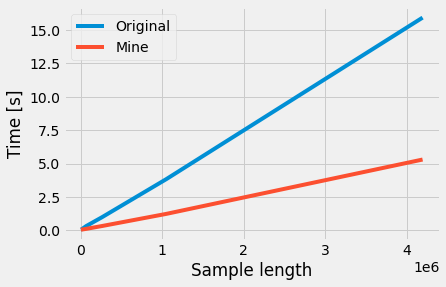

In [81]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.plot(lens_audio, orig_times, label='Original')
ax.plot(lens_audio, mine_times, label='Mine')
ax.legend()
ax.set_xlabel('Sample length')
ax.set_ylabel(r'Time [s]')
plt.show()

